In [1]:
import pandas as pd
import os

# ÊâÄÊúâÊñá‰ª∂ÂêçÂèäÂÖ∂Ë∑ØÂæÑ
folder = 'csv_symbol'
filenames = [
    'E-MTAB-316_symbol.csv',
    'E-MTAB-317_symbol.csv',
    'GSE2113_symbol.csv',
    'GSE5900_symbol.csv',
    'GSE6477_symbol.csv',
    'GSE13591_symbol.csv',
    'GSE235356_symbol.csv'
]

# 1. Ëé∑ÂèñÊâÄÊúâÊï∞ÊçÆÈõÜÁöÑÂü∫Âõ†‰∫§ÈõÜÔºàÂàóÂêçÔºå‰ªéÁ¨¨2ÂàóÂºÄÂßãÔºâ
gene_sets = []
for file in filenames:
    df = pd.read_csv(os.path.join(folder, file))
    genes = set(df.columns[1:])  # ÊéíÈô§ SampleID
    gene_sets.append(genes)

# ËÆ°ÁÆó‰∫§ÈõÜ
common_genes = set.intersection(*gene_sets)
common_genes = sorted(list(common_genes))  # ÊéíÂ∫èÊñπ‰æøÁªü‰∏ÄÂàóÈ°∫Â∫è

print(f"‰∫§ÈõÜÂü∫Âõ†Êï∞ÈáèÔºö{len(common_genes)}")

# 2. Ê†áÂáÜÂåñÂπ∂ÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÈõÜ
merged_list = []

for file in filenames:
    dataset_name = file.replace('_symbol.csv', '')
    df = pd.read_csv(os.path.join(folder, file))

    # ‰ªÖ‰øùÁïô SampleID„ÄÅ‰∫§ÈõÜÂü∫Âõ†
    df_common = df[['SampleID'] + common_genes].copy()
    df_common.insert(1, 'Dataset', dataset_name)  # ÊèíÂÖ• Dataset ÂàóÂú®Á¨¨‰∫åÂàó
    merged_list.append(df_common)

# ÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÈõÜ
merged_df = pd.concat(merged_list, axis=0)

# ‰øùÂ≠ò‰∏∫ CSV
merged_df.to_csv('merged_intersected_symbol_with_dataset.csv', index=False)

print("‚úÖ ÂêàÂπ∂ÂÆåÊàêÔºåÊñá‰ª∂‰øùÂ≠ò‰∏∫ merged_intersected_symbol_with_dataset.csv")

‰∫§ÈõÜÂü∫Âõ†Êï∞ÈáèÔºö12920
‚úÖ ÂêàÂπ∂ÂÆåÊàêÔºåÊñá‰ª∂‰øùÂ≠ò‰∏∫ merged_intersected_symbol_with_dataset.csv


In [17]:
import pandas as pd
import numpy as np

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_intersected_symbol_with_dataset.csv")

# ÊèêÂèñÊâÄÊúâÊï∞ÊçÆÈõÜ
datasets = df["Dataset"].unique()

# Âà§Êñ≠ÊØè‰∏™Êï∞ÊçÆÈõÜÊòØÂê¶Â∑≤ log2 ËΩ¨Êç¢
log2_status = {}

for ds in datasets:
    subset = df[df["Dataset"] == ds]
    expression_values = subset.drop(columns=["SampleID", "Dataset"])
    q75 = expression_values.apply(lambda x: np.percentile(x, 75))
    log2_status[ds] = all(q75 < 16)  # True Ë°®Á§∫Â∑≤Áªè log2 ËΩ¨Êç¢

# ËæìÂá∫Áä∂ÊÄÅ
for ds, is_log2 in log2_status.items():
    print(f"{ds}: {'Â∑≤log2ËΩ¨Êç¢' if is_log2 else 'Êú™ËΩ¨Êç¢'}")

E-MTAB-316: Êú™ËΩ¨Êç¢
E-MTAB-317: Êú™ËΩ¨Êç¢
GSE2113: Êú™ËΩ¨Êç¢
GSE5900: Êú™ËΩ¨Êç¢
GSE6477: Êú™ËΩ¨Êç¢
GSE13591: Â∑≤log2ËΩ¨Êç¢
GSE235356: Êú™ËΩ¨Êç¢


In [18]:
# Â§çÂà∂‰∏Ä‰ªΩÂéüÂßãÊï∞ÊçÆ
df_log2 = df.copy()

# ÂØπÊØè‰∏™Êú™ log2 ËΩ¨Êç¢ÁöÑÊï∞ÊçÆÈõÜËøõË°åËΩ¨Êç¢
for ds, is_log2 in log2_status.items():
    if not is_log2:
        idx = df_log2["Dataset"] == ds
        expr_cols = df_log2.columns.difference(["SampleID", "Dataset"])
        df_log2.loc[idx, expr_cols] = df_log2.loc[idx, expr_cols].applymap(lambda x: np.log2(x + 1))

# ‰øùÂ≠òËΩ¨Êç¢ÂêéÁöÑÊñá‰ª∂
df_log2.to_csv("merged_intersected_symbol_with_dataset_log2transformed.csv", index=False)

/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_40983/3475018168.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log2.loc[idx, expr_cols] = df_log2.loc[idx, expr_cols].applymap(lambda x: np.log2(x + 1))
/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_40983/3475018168.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log2.loc[idx, expr_cols] = df_log2.loc[idx, expr_cols].applymap(lambda x: np.log2(x + 1))
/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_40983/3475018168.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log2.loc[idx, expr_cols] = df_log2.loc[idx, expr_cols].applymap(lambda x: np.log2(x + 1))
/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_40983/3475018168.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log2.loc[idx, expr_cols] = df_log2.loc[idx, expr_cols]

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_intersected_symbol_with_dataset_log2transformed.csv")

# ÂéªÈô§ÈùûË°®ËææÊï∞ÊçÆÂàó
expr = df.drop(columns=["SampleID", "Dataset"])

# ËΩ¨ÁΩÆ‰∏∫ gene √ó sample Ê†ºÂºè
expr_T = expr.transpose()

# Êü•ÁúãÂêÑÊ†∑Êú¨ÂàÜ‰ΩçÁÇπ
quantiles = expr_T.quantile([0.25, 0.5, 0.75])

# ÁªòÂõæÔºöÂàÜ‰ΩçÁÇπÁÉ≠Âõæ
plt.figure(figsize=(12, 5))
sns.boxplot(data=expr_T, whis=[5, 95], showfliers=False)
plt.xticks([], [])  # ‰∏çÊòæÁ§∫ÊâÄÊúâÊ†∑Êú¨ÂêçÔºåÈÅøÂÖçÂ§™ÂØÜ
plt.title("Expression Distribution Across Samples (Log2 Transformed)")
plt.ylabel("log2(Expression)")
plt.xlabel("Samples")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_intersected_symbol_with_dataset_log2transformed.csv")

# ÊèêÂèñË°®ËææÊï∞ÊçÆ„ÄÅÊ†∑Êú¨ID‰∏éÊï∞ÊçÆÈõÜÊ†áÁ≠æ
expr = df.drop(columns=["SampleID", "Dataset"])
sample_ids = df["SampleID"].values
datasets = df["Dataset"].values

# ÊåâÊï∞ÊçÆÈõÜÂàÜÁªÑÊ†∑Êú¨
dataset_groups = {}
current_idx = 0
for dataset in np.unique(datasets):
    count = sum(datasets == dataset)
    dataset_groups[dataset] = (current_idx, current_idx + count - 1)
    current_idx += count

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(20, 8))

# ÂàõÂª∫ÁÆ±Á∫øÂõæÔºàÊ†∑Êú¨Á∫ßÔºâ
box = plt.boxplot(
    expr.values.T, 
    patch_artist=True, 
    showfliers=False, 
    whis=[5, 95],
    widths=0.7,
    positions=np.arange(len(expr)))

plt.title("Expression Distribution Across Samples (Before Qnorm)", fontsize=20)
plt.ylabel("log2(Expression)", fontsize=20)
plt.xlabel("Samples Grouped by Dataset", fontsize=20, labelpad=29)
plt.xticks([])  # ÈöêËóèÊ†∑Êú¨Á∫ßÂàªÂ∫¶

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫øÂíåÊ†áÁ≠æ
ax = plt.gca()
y_min, y_max = ax.get_ylim()
offset = (y_max - y_min) * 0.05  # Ê†áÁ≠æÂÅèÁßªÈáè

for dataset, (start_idx, end_idx) in dataset_groups.items():
    if start_idx > 0:
        plt.axvline(x=start_idx - 0.5, color='gray', linestyle='--', alpha=0.7)
    
    mid_point = (start_idx + end_idx) / 2
    plt.text(
        mid_point, 
        y_min - offset, 
        dataset, 
        ha='center', 
        va='center', 
        fontsize=20,
        rotation=0
    )

# Ê∑ªÂä†Âõæ‰æãËØ¥Êòé
legend_elements = [
    Line2D([0], [0], color='gray', ls='--', label='Dataset Boundaries'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
           markersize=10, label='Individual Samples')
]
plt.legend(handles=legend_elements, loc='upper right', prop={'size': 12})

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)  # ‰∏∫Â∫ïÈÉ®Ê®™ÂêëÊ†áÁ≠æÁïôÂá∫Á©∫Èó¥
plt.show()

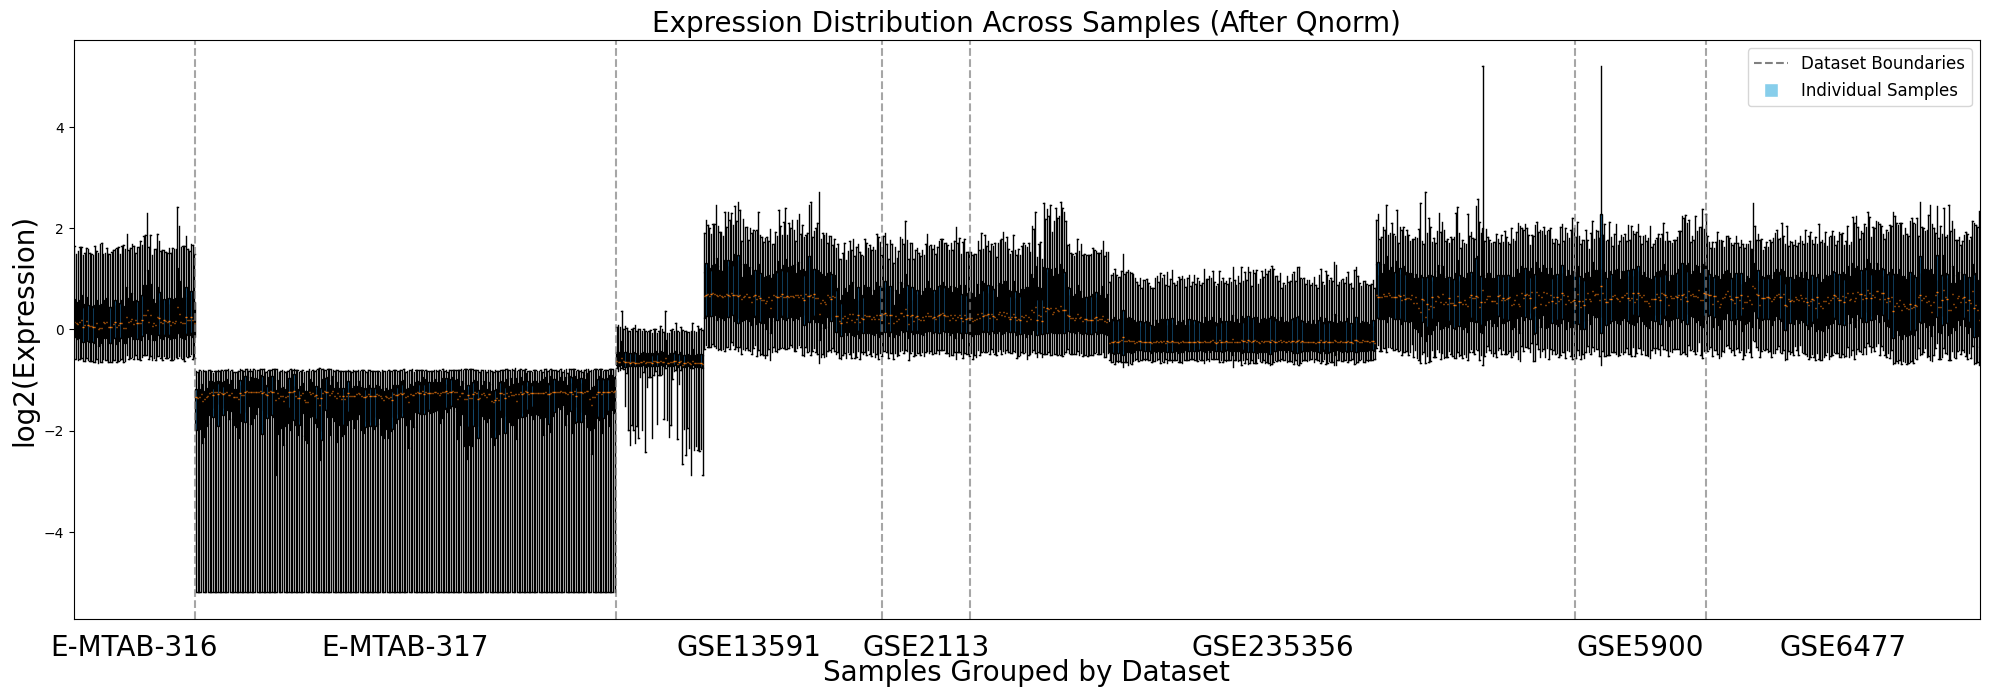

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_qnorm_log2.csv")

# ÊèêÂèñË°®ËææÊï∞ÊçÆ„ÄÅÊ†∑Êú¨ID‰∏éÊï∞ÊçÆÈõÜÊ†áÁ≠æ
expr = df.drop(columns=["SampleID", "Dataset"])
sample_ids = df["SampleID"].values
datasets = df["Dataset"].values

# ÊåâÊï∞ÊçÆÈõÜÂàÜÁªÑÊ†∑Êú¨
dataset_groups = {}
current_idx = 0
for dataset in np.unique(datasets):
    count = sum(datasets == dataset)
    dataset_groups[dataset] = (current_idx, current_idx + count - 1)
    current_idx += count

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(20, 8))

# ÂàõÂª∫ÁÆ±Á∫øÂõæÔºàÊ†∑Êú¨Á∫ßÔºâ
box = plt.boxplot(
    expr.values.T, 
    patch_artist=True, 
    showfliers=False, 
    whis=[5, 95],
    widths=0.7,
    positions=np.arange(len(expr)))

plt.title("Expression Distribution Across Samples (After Qnorm)", fontsize=20)
plt.ylabel("log2(Expression)", fontsize=20)
plt.xlabel("Samples Grouped by Dataset", fontsize=20, labelpad=29)
plt.xticks([])  # ÈöêËóèÊ†∑Êú¨Á∫ßÂàªÂ∫¶

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫øÂíåÊ†áÁ≠æ
ax = plt.gca()
y_min, y_max = ax.get_ylim()
offset = (y_max - y_min) * 0.05  # Ê†áÁ≠æÂÅèÁßªÈáè

for dataset, (start_idx, end_idx) in dataset_groups.items():
    if start_idx > 0:
        plt.axvline(x=start_idx - 0.5, color='gray', linestyle='--', alpha=0.7)
    
    mid_point = (start_idx + end_idx) / 2
    plt.text(
        mid_point, 
        y_min - offset, 
        dataset, 
        ha='center', 
        va='center', 
        fontsize=20,
        rotation=0
    )

# Ê∑ªÂä†Âõæ‰æãËØ¥Êòé
legend_elements = [
    Line2D([0], [0], color='gray', ls='--', label='Dataset Boundaries'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
           markersize=10, label='Individual Samples')
]
plt.legend(handles=legend_elements, loc='upper right', prop={'size': 12})

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)  # ‰∏∫Â∫ïÈÉ®Ê®™ÂêëÊ†áÁ≠æÁïôÂá∫Á©∫Èó¥
plt.show()

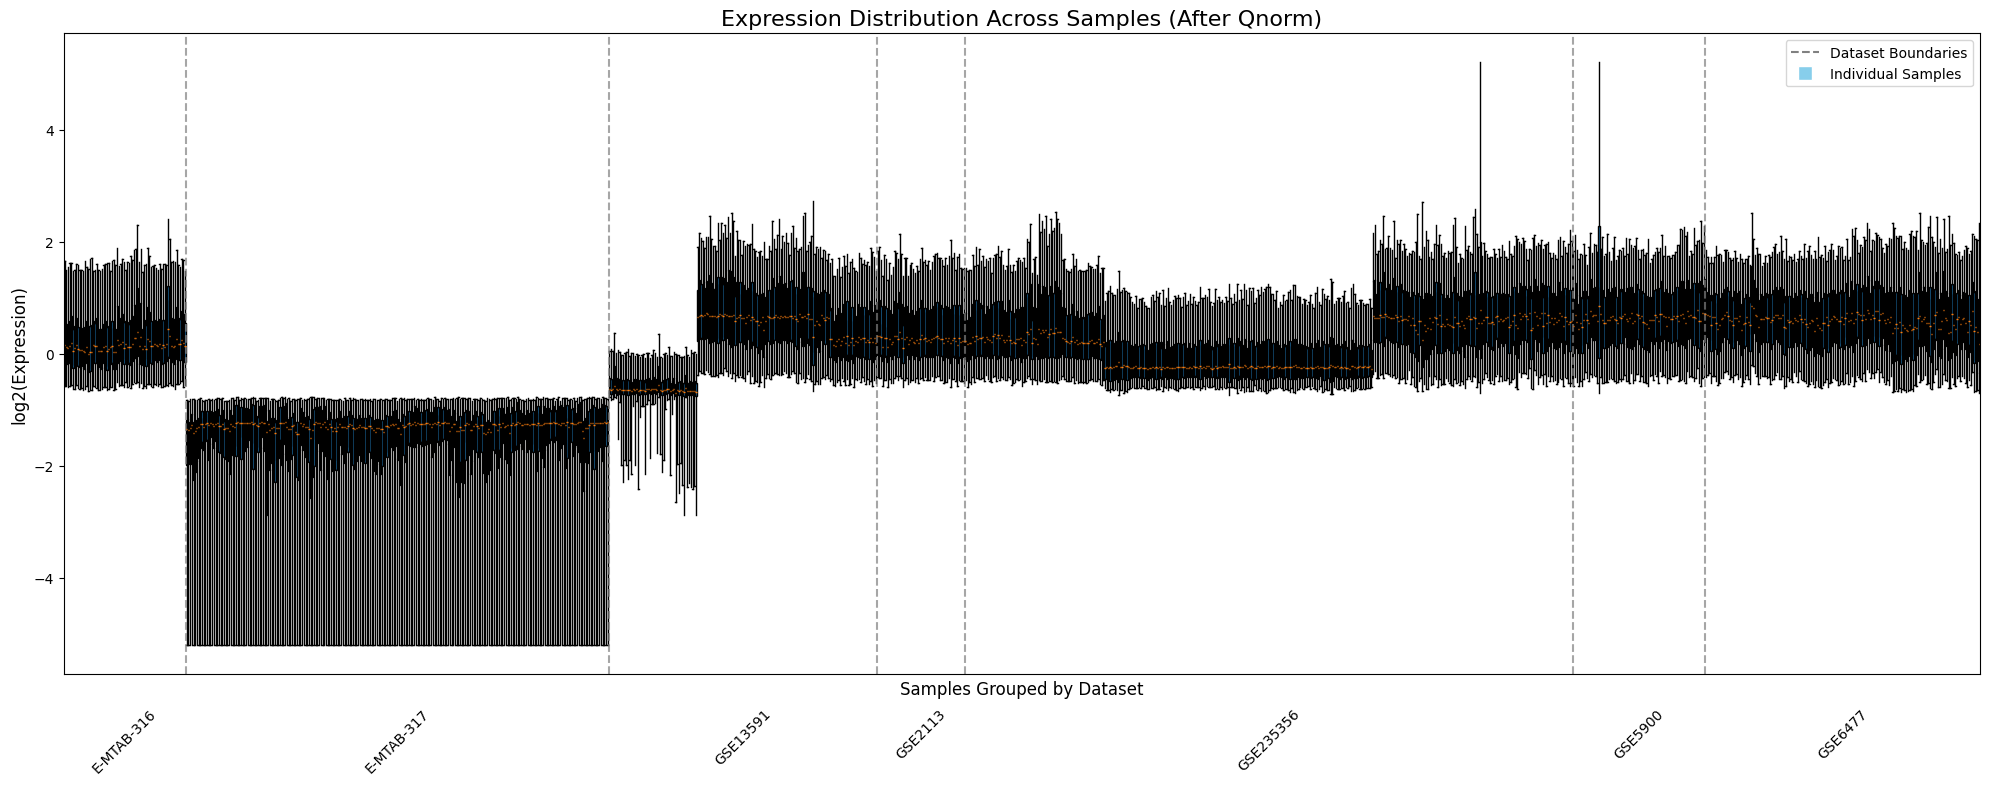

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_qnorm_log2.csv")

# ÊèêÂèñË°®ËææÊï∞ÊçÆ„ÄÅÊ†∑Êú¨ID‰∏éÊï∞ÊçÆÈõÜÊ†áÁ≠æ
expr = df.drop(columns=["SampleID", "Dataset"])
sample_ids = df["SampleID"].values
datasets = df["Dataset"].values

# ÊåâÊï∞ÊçÆÈõÜÂàÜÁªÑÊ†∑Êú¨
dataset_groups = {}
current_idx = 0
for dataset in np.unique(datasets):
    count = sum(datasets == dataset)
    dataset_groups[dataset] = (current_idx, current_idx + count - 1)
    current_idx += count

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(20, 8))

# ÂàõÂª∫ÁÆ±Á∫øÂõæÔºàÊ†∑Êú¨Á∫ßÔºâ
box = plt.boxplot(
    expr.values.T, 
    patch_artist=True, 
    showfliers=False, 
    whis=[5, 95],
    widths=0.7,
    positions=np.arange(len(expr)))
plt.title("Expression Distribution Across Samples (After Qnorm)", fontsize=16)
plt.ylabel("log2(Expression)", fontsize=12)
plt.xlabel("Samples Grouped by Dataset", fontsize=12)
plt.xticks([])  # ÈöêËóèÊ†∑Êú¨Á∫ßÂàªÂ∫¶

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫øÂíåÊ†áÁ≠æ
ax = plt.gca()
y_min, y_max = ax.get_ylim()
offset = (y_max - y_min) * 0.05  # Ê†áÁ≠æÂÅèÁßªÈáè

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫ø
for dataset, (start_idx, end_idx) in dataset_groups.items():
    if start_idx > 0:  # Ë∑≥ËøáÁ¨¨‰∏Ä‰∏™Êï∞ÊçÆÈõÜÁöÑÂàÜÈöîÁ∫ø
        plt.axvline(x=start_idx - 0.5, color='gray', linestyle='--', alpha=0.7)
    
    # Âú®Êï∞ÊçÆÈõÜ‰∏≠Èó¥‰ΩçÁΩÆÊ∑ªÂä†Ê†áÁ≠æ
    mid_point = (start_idx + end_idx) / 2
    plt.text(
        mid_point, 
        y_min - offset, 
        dataset, 
        ha='center', 
        va='top', 
        fontsize=10,
        rotation=45
    )

# Ê∑ªÂä†Âõæ‰æãËØ¥Êòé
legend_elements = [
    Line2D([0], [0], color='gray', ls='--', label='Dataset Boundaries'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
           markersize=10, label='Individual Samples')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # ‰∏∫Â∫ïÈÉ®Ê†áÁ≠æÁïôÂá∫Á©∫Èó¥
plt.show()

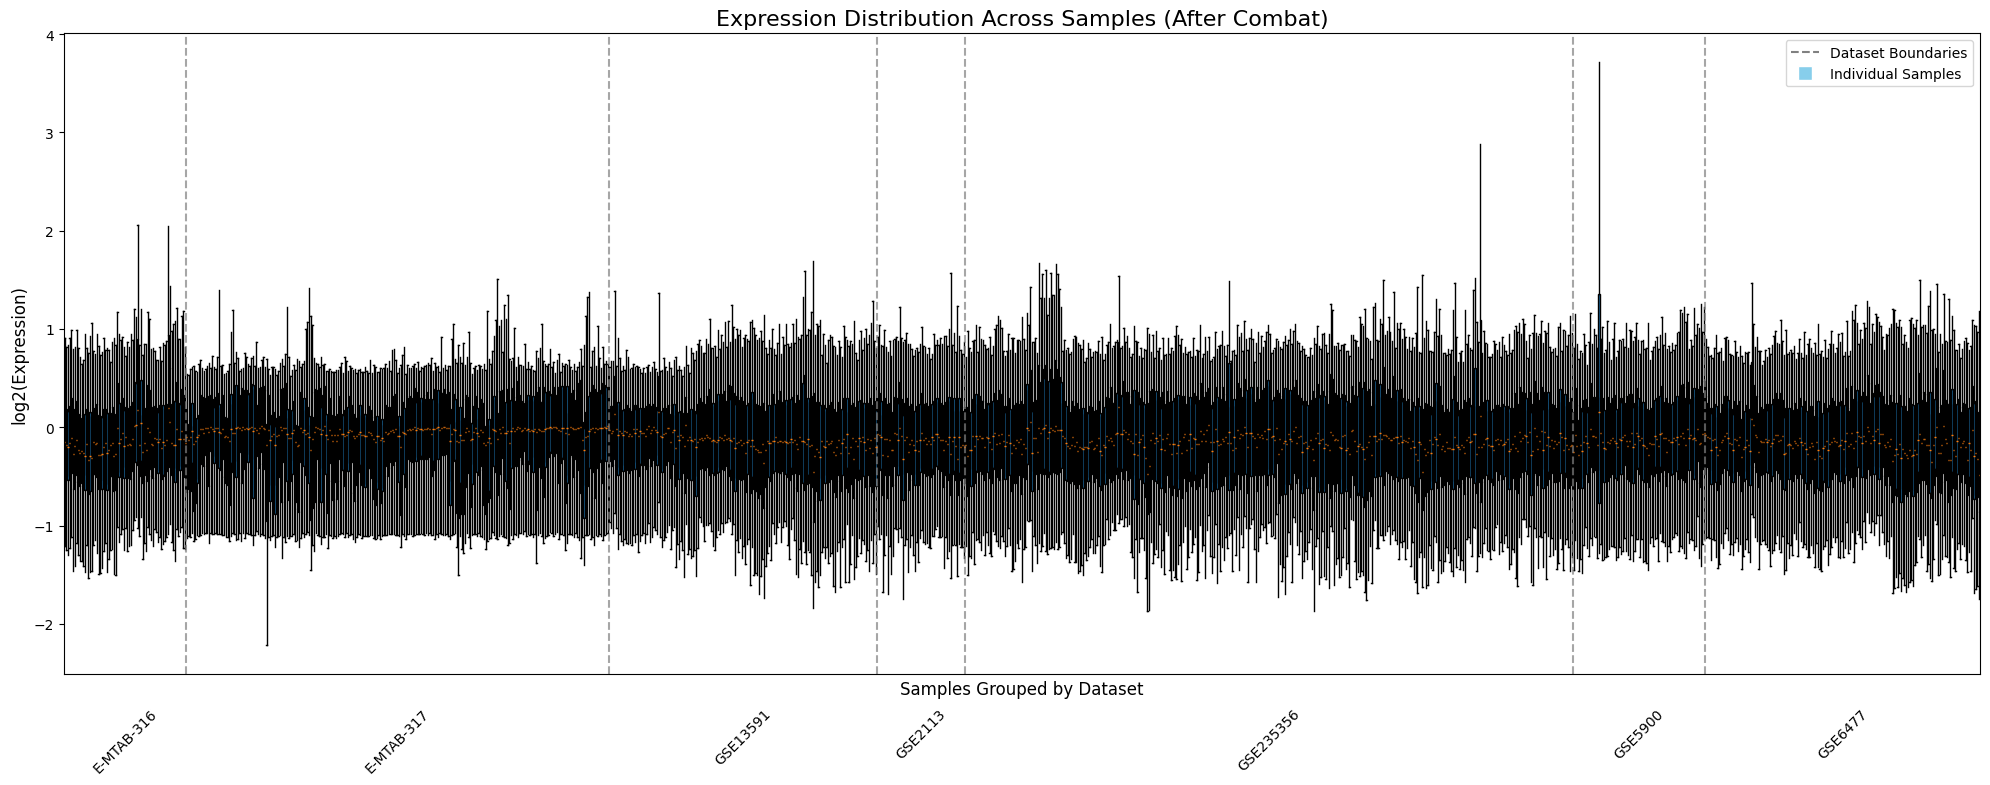

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_qnorm_combat.csv")

# ÊèêÂèñË°®ËææÊï∞ÊçÆ„ÄÅÊ†∑Êú¨ID‰∏éÊï∞ÊçÆÈõÜÊ†áÁ≠æ
expr = df.drop(columns=["SampleID", "Dataset"])
sample_ids = df["SampleID"].values
datasets = df["Dataset"].values

# ÊåâÊï∞ÊçÆÈõÜÂàÜÁªÑÊ†∑Êú¨
dataset_groups = {}
current_idx = 0
for dataset in np.unique(datasets):
    count = sum(datasets == dataset)
    dataset_groups[dataset] = (current_idx, current_idx + count - 1)
    current_idx += count

# ÂàõÂª∫ÂõæÂΩ¢
plt.figure(figsize=(20, 8))

# ÂàõÂª∫ÁÆ±Á∫øÂõæÔºàÊ†∑Êú¨Á∫ßÔºâ
box = plt.boxplot(
    expr.values.T, 
    patch_artist=True, 
    showfliers=False, 
    whis=[5, 95],
    widths=0.7,
    positions=np.arange(len(expr)))
plt.title("Expression Distribution Across Samples (After Combat)", fontsize=16)
plt.ylabel("log2(Expression)", fontsize=12)
plt.xlabel("Samples Grouped by Dataset", fontsize=12)
plt.xticks([])  # ÈöêËóèÊ†∑Êú¨Á∫ßÂàªÂ∫¶

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫øÂíåÊ†áÁ≠æ
ax = plt.gca()
y_min, y_max = ax.get_ylim()
offset = (y_max - y_min) * 0.05  # Ê†áÁ≠æÂÅèÁßªÈáè

# Ê∑ªÂä†Êï∞ÊçÆÈõÜÂàÜÈöîÁ∫ø
for dataset, (start_idx, end_idx) in dataset_groups.items():
    if start_idx > 0:  # Ë∑≥ËøáÁ¨¨‰∏Ä‰∏™Êï∞ÊçÆÈõÜÁöÑÂàÜÈöîÁ∫ø
        plt.axvline(x=start_idx - 0.5, color='gray', linestyle='--', alpha=0.7)
    
    # Âú®Êï∞ÊçÆÈõÜ‰∏≠Èó¥‰ΩçÁΩÆÊ∑ªÂä†Ê†áÁ≠æ
    mid_point = (start_idx + end_idx) / 2
    plt.text(
        mid_point, 
        y_min - offset, 
        dataset, 
        ha='center', 
        va='top', 
        fontsize=10,
        rotation=45
    )

# Ê∑ªÂä†Âõæ‰æãËØ¥Êòé
legend_elements = [
    Line2D([0], [0], color='gray', ls='--', label='Dataset Boundaries'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
           markersize=10, label='Individual Samples')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # ‰∏∫Â∫ïÈÉ®Ê†áÁ≠æÁïôÂá∫Á©∫Èó¥
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("merged_intersected_symbol_with_dataset_log2transformed.csv")

# ÊåâÊï∞ÊçÆÈõÜÂàÜÁªÑÂπ∂ÈáçÁªÑÊï∞ÊçÆ
melted_df = df.melt(id_vars=["SampleID", "Dataset"], 
                    var_name="Gene", 
                    value_name="Expression")

# ÊåâÊï∞ÊçÆÈõÜÁîüÊàêÈ¢úËâ≤
unique_datasets = melted_df["Dataset"].unique()
palette = sns.color_palette("tab10", len(unique_datasets))
dataset_to_color = dict(zip(unique_datasets, palette))

# ÂàõÂª∫ÂàÜÁªÑÁÆ±Á∫øÂõæ
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=melted_df,
    x="Dataset",
    y="Expression",
    palette=palette,
    showfliers=False,
    whis=[5, 95],
    width=0.7
)

# ÂõæÂΩ¢ËÆæÁΩÆ
plt.title("Expression Distribution by Dataset (Log2 Transformed, Before Qnorm)", fontsize=14)
plt.ylabel("log2(Expression)")
plt.xlabel("Dataset")
plt.xticks(rotation=45, ha='right')  # ÊóãËΩ¨Êï∞ÊçÆÈõÜÊ†áÁ≠æÈò≤Ê≠¢ÈáçÂè†

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer

# ËØªÂèñÂéüÂßã log2 Êñá‰ª∂
df = pd.read_csv("merged_intersected_symbol_with_dataset_log2transformed.csv")

# ÂàÜÁ¶ªÂÖÉÊï∞ÊçÆÂàó
metadata_cols = ["SampleID", "Dataset"]
meta = df[metadata_cols]
expr = df.drop(columns=metadata_cols)

# ‰ΩøÁî® QuantileTransformer ËøõË°åÊ†áÂáÜÂåñ
qt = QuantileTransformer(output_distribution='normal', random_state=42, copy=True)
expr_qnorm = qt.fit_transform(expr)

# ËΩ¨Âõû DataFrame Âπ∂ÊÅ¢Â§çÂàóÂêç
expr_qnorm_df = pd.DataFrame(expr_qnorm, columns=expr.columns)

# ÂêàÂπ∂ÂÖÉÊï∞ÊçÆÂíåË°®ËææÊï∞ÊçÆ
df_qnorm = pd.concat([meta, expr_qnorm_df], axis=1)

# ‰øùÂ≠ò‰∏∫Êñ∞Êñá‰ª∂
df_qnorm.to_csv("merged_qnorm_log2.csv", index=False)

print("‚úÖ Quantile normalization ÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠ò‰∏∫ merged_qnorm_log2.csv")

‚úÖ Quantile normalization ÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠ò‰∏∫ merged_qnorm_log2.csv


In [26]:
import pandas as pd

# ËØªÂèñÊ†°Ê≠£ÂêéÁöÑÊñá‰ª∂
df = pd.read_csv('merged_qnorm_combat.csv')

# ËæìÂá∫ÂΩ¢Áä∂
print(f"ÊÄªË°åÊï∞ÔºàÊ†∑Êú¨Êï∞Ôºâ: {df.shape[0]}")
print(f"ÊÄªÂàóÊï∞ÔºàÂåÖÊã¨ SampleID Âíå DatasetÔºâ: {df.shape[1]}")
print(f"Âü∫Âõ†Êï∞ÔºàÊéíÈô§Ââç‰∏§ÂàóÔºâ: {df.shape[1] - 2}")

ÊÄªË°åÊï∞ÔºàÊ†∑Êú¨Êï∞Ôºâ: 1129
ÊÄªÂàóÊï∞ÔºàÂåÖÊã¨ SampleID Âíå DatasetÔºâ: 12922
Âü∫Âõ†Êï∞ÔºàÊéíÈô§Ââç‰∏§ÂàóÔºâ: 12920


In [25]:
import pandas as pd
from pycombat import Combat

# ËØªÂèñ quantile normalization ÂêéÁöÑË°®ËææÁü©Èòµ
df = pd.read_csv('merged_qnorm_log2.csv')

# ÂàÜÁ¶ª meta ‰ø°ÊÅØÂíåË°®ËææÁü©Èòµ
metadata = df[['SampleID', 'Dataset']]
expr = df.drop(columns=['SampleID', 'Dataset'])

# ËΩ¨Êç¢Ë°®ËææÁü©Èòµ‰∏∫ numpy Êï∞ÁªÑ
expr_array = expr.to_numpy()

# ÂàùÂßãÂåñÂπ∂ÊâßË°å Combat ÊâπÊ¨°ÊïàÂ∫îÊ†°Ê≠£
combat = Combat()
expr_corrected = combat.fit_transform(expr_array, metadata['Dataset'].values)

# ËΩ¨Âõû DataFrame Âπ∂Âä†‰∏äÂàóÂêç
expr_corrected_df = pd.DataFrame(expr_corrected, columns=expr.columns)
expr_corrected_df.insert(0, 'Dataset', metadata['Dataset'].values)
expr_corrected_df.insert(0, 'SampleID', metadata['SampleID'].values)

# ‰øùÂ≠ò
expr_corrected_df.to_csv('merged_qnorm_combat.csv', index=False)

print("‚úÖ ‰ΩøÁî® pycombat Ê†°Ê≠£ÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠ò‰∏∫ merged_qnorm_combat.csv")

/Users/kylin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pycombat/pycombat.py:79: RuntimeWarning: divide by zero encountered in divide
  (abs(del_sq_post - del_sq_prior) / del_sq_prior).max())


‚úÖ ‰ΩøÁî® pycombat Ê†°Ê≠£ÂÆåÊàêÔºåÁªìÊûúÂ∑≤‰øùÂ≠ò‰∏∫ merged_qnorm_combat.csv


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

def run_pca_and_plot(file, prefix):
    # ËØªÂèñÊï∞ÊçÆ
    df = pd.read_csv(file)
    meta = df[['SampleID', 'Dataset']]
    expr = df.drop(columns=['SampleID', 'Dataset'])

    # PCA
    pca = PCA(n_components=10)
    pcs = pca.fit_transform(expr)
    pca_df = pd.DataFrame(pcs[:, :3], columns=['PC1', 'PC2', 'PC3'])
    pca_df['Dataset'] = meta['Dataset'].values

    # ÁªòÂõæÂáΩÊï∞
    def plot_pair(x, y, suffix):
        plt.figure(figsize=(6, 5))
        sns.scatterplot(data=pca_df, x=x, y=y, hue='Dataset', s=50, alpha=0.8)
        plt.title(f'{prefix}: {x} vs {y}')
        plt.tight_layout()
        plt.savefig(f'{prefix}_{x}_vs_{y}.png')
        plt.close()

    # ‰∏âÁßçÁªÑÂêàÂõæ
    plot_pair('PC1', 'PC2', 'pc1vs2')
    plot_pair('PC1', 'PC3', 'pc1vs3')
    plot_pair('PC2', 'PC3', 'pc2vs3')

    # ËæìÂá∫Ëß£ÈáäÂ∫¶
    explained = pca.explained_variance_ratio_[:3] * 100
    print(f"üîé {prefix} PCA Explained Variance: PC1={explained[0]:.2f}%, PC2={explained[1]:.2f}%, PC3={explained[2]:.2f}%")

# üîπ Ê†°Ê≠£Ââç
run_pca_and_plot("merged_qnorm_log2.csv", prefix="Before_ComBat")

# üîπ Ê†°Ê≠£Âêé
run_pca_and_plot("merged_qnorm_combat.csv", prefix="After_ComBat")

üîé Before_ComBat PCA Explained Variance: PC1=72.34%, PC2=5.60%, PC3=1.67%
üîé After_ComBat PCA Explained Variance: PC1=9.28%, PC2=2.64%, PC3=2.37%


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

def run_pca_and_plot(file, prefix):
    # ÂàõÂª∫‰øùÂ≠òÁõÆÂΩï
    os.makedirs("pacnew", exist_ok=True)

    # ËØªÂèñÊï∞ÊçÆ
    df = pd.read_csv(file)
    meta = df[['SampleID', 'Dataset']]
    expr = df.drop(columns=['SampleID', 'Dataset'])

    # PCA
    pca = PCA(n_components=10)
    pcs = pca.fit_transform(expr)
    pca_df = pd.DataFrame(pcs[:, :3], columns=['PC1', 'PC2', 'PC3'])

    # ËÆæÁΩÆ Dataset Á±ªÂûãÔºåÁ°Æ‰øù GSE5900 Âú®ÊúÄÂêéÁªòÂà∂ÔºàÊòæÁ§∫Âú®ÊúÄ‰∏äÂ±ÇÔºâ
    meta['Dataset'] = pd.Categorical(
        meta['Dataset'], 
        categories=sorted(meta['Dataset'].unique(), key=lambda x: x != 'GSE5900')
    )
    pca_df['Dataset'] = meta['Dataset'].values

    # ÁªòÂõæÂáΩÊï∞
    def plot_pair(x, y, suffix):
        plt.figure(figsize=(6, 5))
        sns.scatterplot(
            data=pca_df, x=x, y=y, hue='Dataset',
            s=30,              # üî∏Êõ¥ÊîπÁÇπÁöÑÂ§ßÂ∞èÔºàÂéü‰∏∫ s=50Ôºâ
            alpha=0.8,
            #edgecolor='none'  # üî∏ÂéªÈô§Êï£ÁÇπÁöÑÁôΩËæπ
            
        )
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        plt.title(f'{prefix}: {x} vs {y}')
        plt.tight_layout()
        plt.savefig(f'pacnew/{prefix}_{x}_vs_{y}.png')
        plt.close()


    # ‰∏âÁßçÁªÑÂêàÂõæ
    plot_pair('PC1', 'PC2', 'pc1vs2')
    plot_pair('PC1', 'PC3', 'pc1vs3')
    plot_pair('PC2', 'PC3', 'pc2vs3')

    # ËæìÂá∫Ëß£ÈáäÂ∫¶
    explained = pca.explained_variance_ratio_[:3] * 100
    print(f"üîé {prefix} PCA Explained Variance: PC1={explained[0]:.2f}%, PC2={explained[1]:.2f}%, PC3={explained[2]:.2f}%")

# üîπ Ê†°Ê≠£Ââç
run_pca_and_plot("merged_qnorm_log2.csv", prefix="Before_ComBat")

# üîπ Ê†°Ê≠£Âêé
run_pca_and_plot("merged_qnorm_combat.csv", prefix="After_ComBat")

/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_24742/55521668.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['Dataset'] = pd.Categorical(


üîé Before_ComBat PCA Explained Variance: PC1=72.34%, PC2=5.60%, PC3=1.67%


/var/folders/j3/_3qg9gs11jjc7473nnygd52r0000gn/T/ipykernel_24742/55521668.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['Dataset'] = pd.Categorical(


üîé After_ComBat PCA Explained Variance: PC1=9.28%, PC2=2.64%, PC3=2.37%


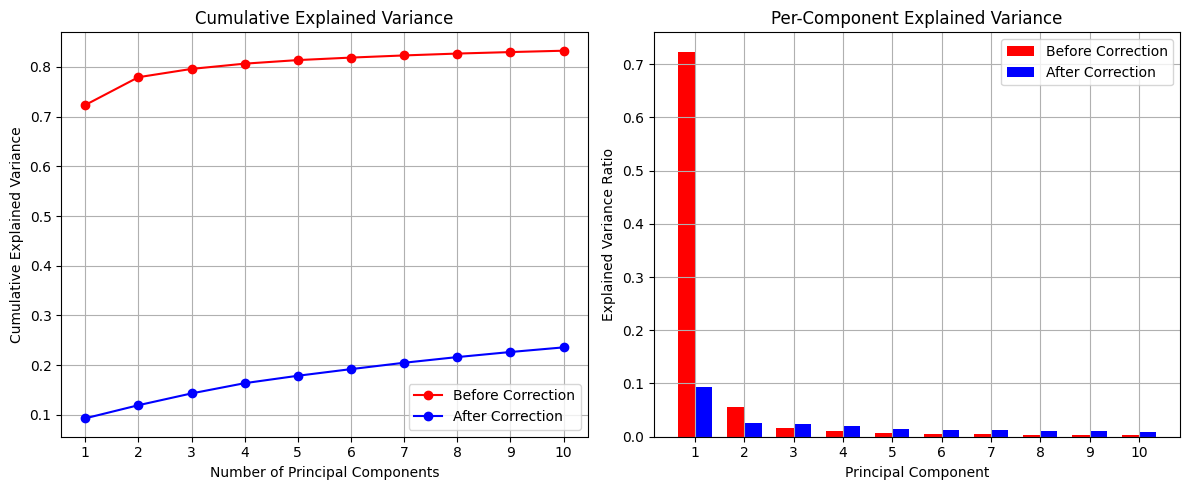

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ËØªÂèñÊñá‰ª∂
before_df = pd.read_csv("merged_qnorm_log2.csv")
after_df = pd.read_csv("merged_qnorm_combat.csv")

# ÊèêÂèñË°®ËææÁü©ÈòµÔºàÂéªÈô§ÂÖÉÊï∞ÊçÆÂàóÔºâ
X_before = before_df.drop(columns=["SampleID", "Dataset"]).values
X_after = after_df.drop(columns=["SampleID", "Dataset"]).values

# PCA ÊãüÂêà
pca_before = PCA(n_components=10).fit(X_before)
pca_after = PCA(n_components=10).fit(X_after)

# Ëé∑ÂèñËß£ÈáäÂ∫¶Êï∞ÊçÆ
explained_before = pca_before.explained_variance_ratio_
explained_after = pca_after.explained_variance_ratio_
cumulative_before = np.cumsum(explained_before)
cumulative_after = np.cumsum(explained_after)

# ËÆæÁΩÆÂõæÂΩ¢
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Â∑¶ÂõæÔºöÁ¥ØËÆ°Ëß£ÈáäÊñπÂ∑Æ
axs[0].plot(range(1, 11), cumulative_before, marker='o', color='red', label='Before Correction')
axs[0].plot(range(1, 11), cumulative_after, marker='o', color='blue', label='After Correction')
axs[0].set_title("Cumulative Explained Variance")
axs[0].set_xlabel("Number of Principal Components")
axs[0].set_ylabel("Cumulative Explained Variance")
axs[0].set_xticks(np.arange(1, 11, 1))  # ‚úÖ ËÆæÁΩÆÊ®™ÂùêÊ†á‰∏∫Êï¥Êï∞Ê≠•Èïø
axs[0].legend()
axs[0].grid(True)

# Âè≥ÂõæÔºöÊØè‰∏™‰∏ªÊàêÂàÜËß£ÈáäÂ∫¶
bar_width = 0.35
index = np.arange(1, 11)
axs[1].bar(index - bar_width/2, explained_before, bar_width, color='red', label='Before Correction')
axs[1].bar(index + bar_width/2, explained_after, bar_width, color='blue', label='After Correction')
axs[1].set_title("Per-Component Explained Variance")
axs[1].set_xlabel("Principal Component")
axs[1].set_ylabel("Explained Variance Ratio")
axs[1].set_xticks(np.arange(1, 11, 1))  # ‚úÖ ËÆæÁΩÆÊ®™ÂùêÊ†á‰∏∫Êï¥Êï∞Ê≠•Èïø
axs[1].legend()
axs[1].grid(True)

# ‰øùÂ≠ò‰∏éÊòæÁ§∫
plt.tight_layout()
plt.savefig("explained_variance_comparison.png", dpi=300)
plt.show()

In [29]:
import pandas as pd

# ËØªÂèñÂêàÂπ∂ÂêéÁöÑÊñá‰ª∂
df = pd.read_csv("merged_qnorm_combat.csv")

# Ëé∑ÂèñÂîØ‰∏ÄÊï∞ÊçÆÈõÜÂêçÁß∞
datasets = df["Dataset"].unique()

# ‰æùÊ¨°‰øùÂ≠òÊØè‰∏™Â≠êÊï∞ÊçÆÈõÜ‰∏∫Áã¨Á´ãÊñá‰ª∂
for ds in datasets:
    subset = df[df["Dataset"] == ds]
    filename = f"{ds}.csv"
    subset.to_csv(filename, index=False)

print("‚úÖ ÊãÜÂàÜÂÆåÊàêÔºåÊØè‰∏™Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠ò‰∏∫ dataset_<Dataset>.csv")

‚úÖ ÊãÜÂàÜÂÆåÊàêÔºåÊØè‰∏™Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠ò‰∏∫ dataset_<Dataset>.csv
